# N-Asset Efficient Frontier

In [8]:
import pandas as pd
import numpy as np
%load_ext autoreload
%autoreload 2
%matplotlib inline
import edhec_risk_kit as erk

ind = erk.get_ind_returns()
er = erk.annualize_rets(ind["1996":"2000"], 12)
cov = ind["1996":"2000"].cov()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
from scipy.optimize import minimize 

<AxesSubplot:xlabel='Volatility'>

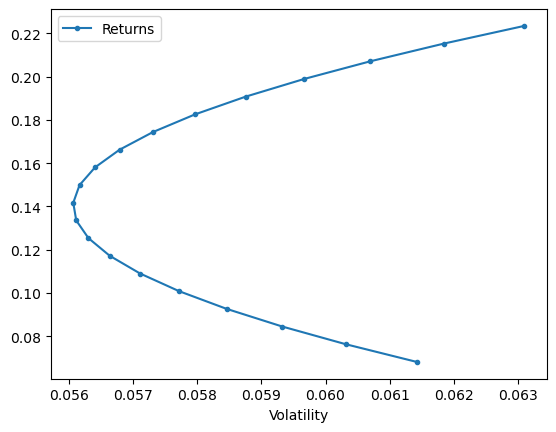

In [10]:
l = ["Games", "Fin"]
erk.plot_ef2(20, er[l], cov.loc[l,l])

In [17]:
# Minimizer to find Efficient Frontier

def minimize_vol(target_return, er, cov):
    """
    target_ret--> w
    """
    n = er.shape[0]
    init_guess = np.repeat(1/n, n)
    bounds = ((0.0, 1.0),)*n    # Tuple of tuples
    return_is_target = {
        'type': 'eq',
        'args': (er,),
        'fun': lambda weights, er: target_return - erk.portfolio_return(weights, er) # Lambda/Anonymous function. not defined outside the block
    }
    weights_sum_to_1 = {
        'type': 'eq',
        'fun': lambda weights: np.sum(weights) - 1
    }
    results = minimize(erk.portfolio_vol, init_guess,
                       args = (cov,), method = "SLSQP",
                       options = {'disp': False},
                       constraints = (return_is_target, weights_sum_to_1),
                       bounds = bounds
                      )
    return results.x
    

In [18]:
l

['Games', 'Fin']

In [23]:
w15 = erk.minimize_vol(0.15, er[l], cov.loc[l,l]) # find portfolio with target return of 15%
vol15 = erk.portfolio_vol(w15, cov.loc[l,l])  # To find us the volatility of the selected portfolio 
vol15

# Will give us the volatility

0.056163669406706564

In [21]:
# To see the necessary weights of the portfolio with minimal risk for that level of return

w15

array([0.47287631, 0.52712369])

In [27]:
# 

def optimal_weights(n_points, er, cov):
    """
    -> list of weights to run the optimizer on to minimize the vol
    """
    target_rs = np.linspace(er.min(), er.max(), n_points)
    weights = [minimize_vol(target_return, er, cov) for target_return in target_rs]
    return weights
    

def plot_ef(n_points, er, cov):
    """
    Plots the Multi-Asset efficient frontier
    """ 
    
    weights = optimal_weights(n_points, er, cov)
    rets = [erk.portfolio_return(w, er) for w in weights]
    vols = [erk.portfolio_vol(w, cov) for w in weights]
    ef = pd.DataFrame({ 
        "Returns" : rets,   
        "Volatility": vols
    })  # to package rets/vol into a dataframe

    return ef.plot.line(x="Volatility", y="Returns", style=".-")


<AxesSubplot:xlabel='Volatility'>

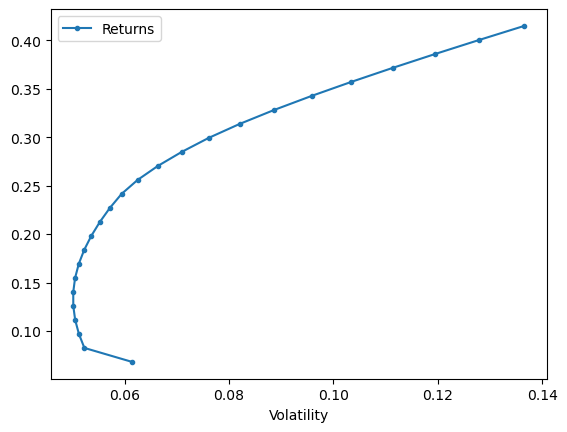

In [28]:
l = ["Smoke", "Fin", "Games", "Coal"]
plot_ef(25, er[l], cov.loc[l,l])

<AxesSubplot:xlabel='Volatility'>

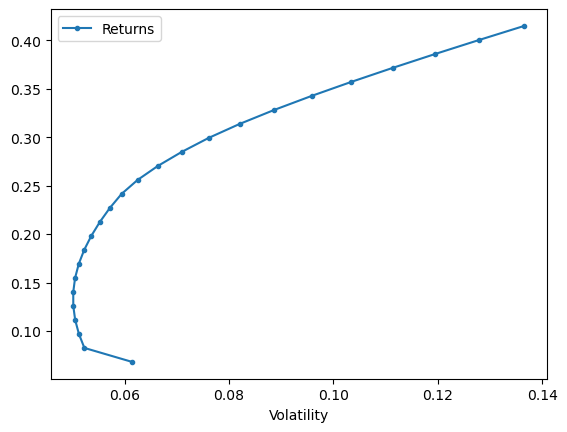

In [29]:
l = ["Smoke", "Fin", "Games", "Coal"]
erk.plot_ef(25, er[l], cov.loc[l,l])

<AxesSubplot:xlabel='Volatility'>

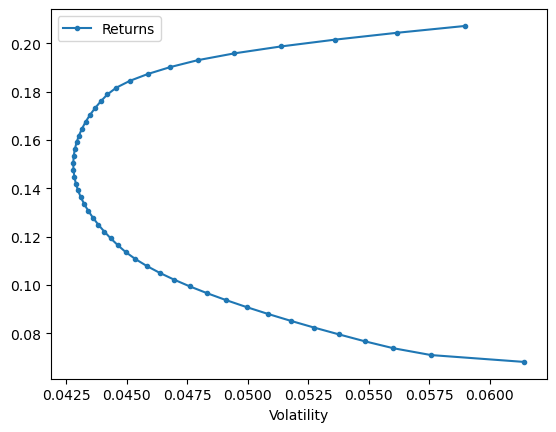

In [31]:
l = ["Autos","Oil","Rtail","Beer","Games"]

erk.plot_ef(50, er[l], cov.loc[l,l])

<AxesSubplot:xlabel='Volatility'>

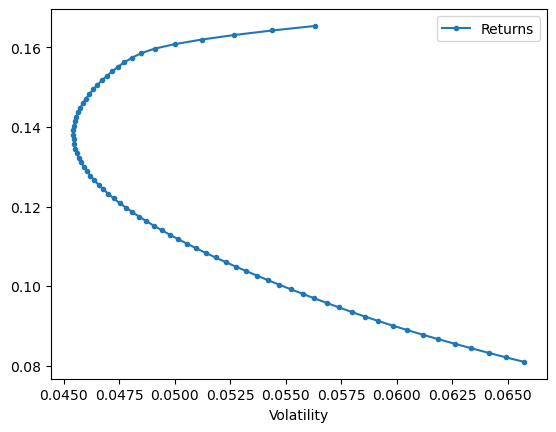

In [34]:
l = ["Autos","Oil","Steel","Beer"]

erk.plot_ef(75, er[l], cov.loc[l,l])

NameError: name 'weights' is not defined